# Pymacueticals

## Observations / Analysis

### 1. Capomulin performs the best as compared to the other drugs in tumor volume reduction, survival rate, and lower metastatic site occurences. 
#### It was the only drug out of the 4 that saw decrease in average tumor size consistently over the 45 day treatment. 
#### The average number of metastatic sites was nearly 1.75 sites lower than the placebo group and the Ketapril group. 
#### Capomulin also saw significantly higher survival rates over the course of the 45 days. 

### 2. Ketapril seems to have a positive affect on tumor volume with the tumors seeing slightly greater average growth over the 45 day time span than the placebo group. 
#### . The Ketapril group saw a slower average increase in metastatic sites than the Placebo group during the course of the 45 days, but overall the number of metatastic sites were about the same. 
#### . Ketapril's surival rates are comparable to the placebo at the end of the 45 day treatment.

### 3.The average Infubinal group tumor growth was similar to that of the placebo group, but the average increase metastatic sites was lower over the course of treatment and overall. 
####  This group still experienced average growth in metastatic sites higher than Capomulin. 


In [ ]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
mouse_df.head()






In [42]:
clinical_df= pd.read_csv("data/clinicaltrial_data.csv")
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [43]:
# Combine the data into a single dataset


# Display the data table for preview

combined_df= pd.merge(mouse_df,clinical_df,on='Mouse ID', how='outer')


combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [44]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor=combined_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
Mean_Tumor_df = pd.DataFrame(Mean_Tumor)

# Preview DataFrame
Mean_Tumor_df





Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [45]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_stderror= combined_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
Tumor_stderror_df = pd.DataFrame(Tumor_stderror)
# Preview DataFrame
Tumor_stderror_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [46]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Tumor_pv = Mean_Tumor_df.reset_index()
Mean_Tumor_pv_df = Mean_Tumor_pv.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

Tumor_stderror_pv = Tumor_stderror_df.reset_index()
Tumor_stderror_pv_df = Tumor_stderror_pv.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


# Preview that Reformatting worked

Mean_Tumor_pv_df.head()
Tumor_stderror_pv_df.head()







Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


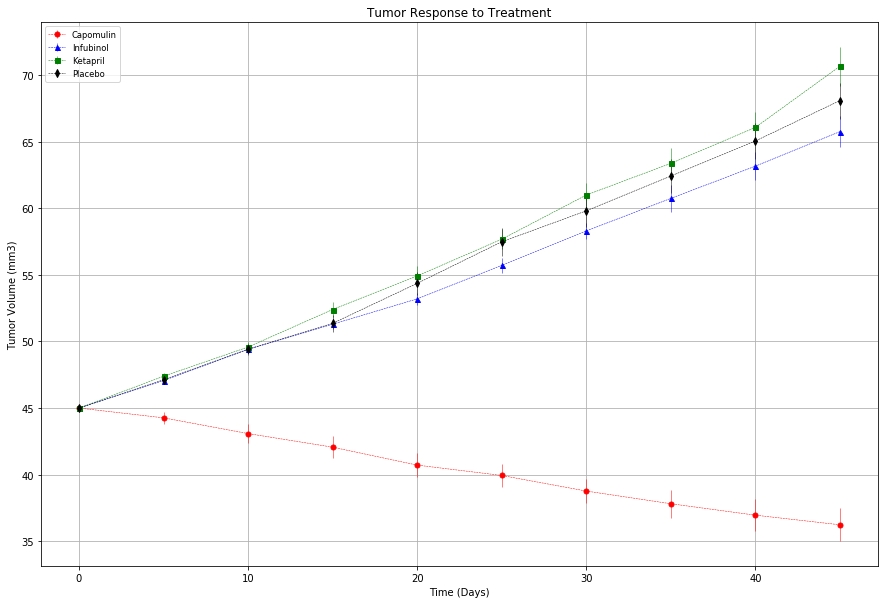

In [47]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.errorbar(Mean_Tumor_pv_df.index, Mean_Tumor_pv_df["Capomulin"], yerr=Tumor_stderror_pv_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", label='Capomulin',linewidth=0.50)
plt.errorbar(Mean_Tumor_pv_df.index, Mean_Tumor_pv_df["Infubinol"], yerr=Tumor_stderror_pv_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", label='Infubinol',linewidth=0.50)
plt.errorbar(Mean_Tumor_pv_df.index, Mean_Tumor_pv_df["Ketapril"], yerr=Tumor_stderror_pv_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", label='Ketapril',linewidth=0.50)
plt.errorbar(Mean_Tumor_pv_df.index, Mean_Tumor_pv_df["Placebo"], yerr=Tumor_stderror_pv_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", label='Placebo',linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("TumourResponse_fig.png")

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [48]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
Mean_metsites = combined_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
Mean_metsites_df = pd.DataFrame(Mean_metsites)

# Preview DataFrame
Mean_metsites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
Stderr_metsites = combined_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
Stderr_metsites_df = pd.DataFrame(Stderr_metsites)

# Preview DataFrame
Stderr_metsites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [50]:
# Minor Data Munging to Re-Format the Data Frames

Mean_metsites_pv = Mean_metsites_df.reset_index()
Mean_metsites_pv_df = Mean_metsites_pv.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

Stderr_metsites_pv = Stderr_metsites_df.reset_index()
Stderr_metsites_pv_df = Stderr_metsites_pv.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked

Stderr_metsites_pv_df.head()

Mean_metsites_pv_df.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


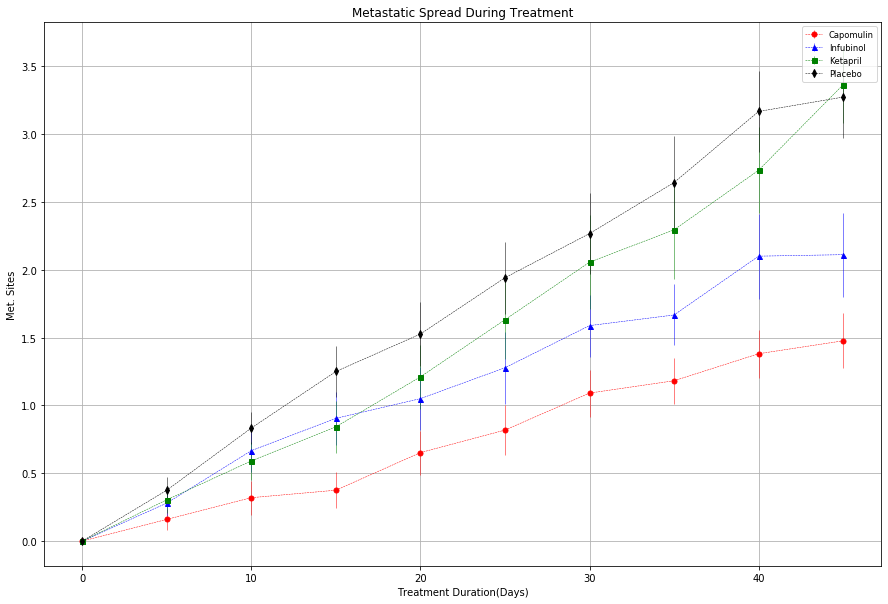

In [51]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.errorbar(Mean_metsites_pv_df.index, Mean_metsites_pv_df["Capomulin"], yerr=Stderr_metsites_pv_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", label='Capomulin',linewidth=0.50)
plt.errorbar(Mean_metsites_pv_df.index, Mean_metsites_pv_df["Infubinol"], yerr=Stderr_metsites_pv_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", label='Infubinol',linewidth=0.50)
plt.errorbar(Mean_metsites_pv_df.index, Mean_metsites_pv_df["Ketapril"], yerr=Stderr_metsites_pv_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", label='Ketapril',linewidth=0.50)
plt.errorbar(Mean_metsites_pv_df.index, Mean_metsites_pv_df["Placebo"], yerr=Stderr_metsites_pv_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", label='Placebo',linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration(Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("MetastaticSpread_Fig.png")

# Show the Figure
plt.show()

## Survival Rates

In [52]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = combined_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [53]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pv = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pv.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


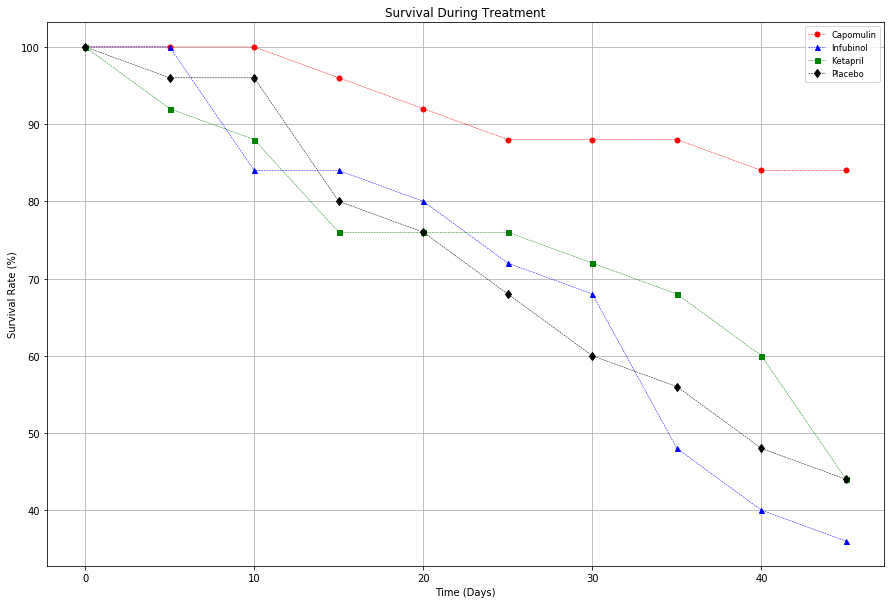

In [54]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15,10))
plt.plot(100 * survival_count_pv["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5,label='Capomulin', linewidth=0.50)
plt.plot(100 * survival_count_pv["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5,label='Infubinol', linewidth=0.50)
plt.plot(100 * survival_count_pv["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5,label='Ketapril', linewidth=0.50)
plt.plot(100 * survival_count_pv["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6,label='Placebo', linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("SurvivalRate_Fig.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug
tumor_prcnt_chnge_mean =  100 * (Mean_Tumor_pv_df.iloc[-1] - Mean_Tumor_pv_df.iloc[0]) / Mean_Tumor_pv_df.iloc[0]
# Display the data to confirm
tumor_prcnt_chnge_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [56]:
# Store all Relevant Percent Changes into a Tuple
tup_prcnt_chnge = (tumor_prcnt_chnge_mean["Capomulin"],
               tumor_prcnt_chnge_mean["Infubinol"],
               tumor_prcnt_chnge_mean["Ketapril"],
               tumor_prcnt_chnge_mean["Placebo"])

tup_prcnt_chnge



(-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153)

In [73]:
# Splice the data between passing and failing drugs

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(tup_prcnt_chnge))
y=list(tup_prcnt_chnge)
y = [round(x) for x in y]
y



[-19.0, 46.0, 57.0, 51.0]

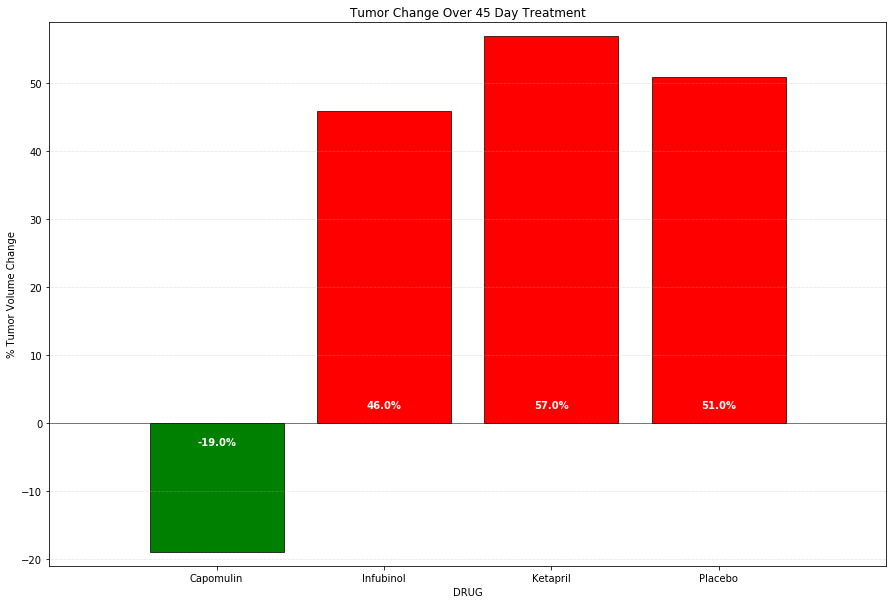

In [76]:
# Set the colors of the bars depending on if pos or neg

colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

# Set up the bar graph 
plt.figure(figsize = (15,10))
tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlabel("DRUG")
# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)
 
# Use functions to label the percentages of changes
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          



# Call functions to implement the function calls

autolabel(tumor_growth_bar)

# Save the Figure
plt.savefig("Tumour_Change_OverTreatment.png")

# Show the Figure

plt.show()